In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as sim

(101, 401)

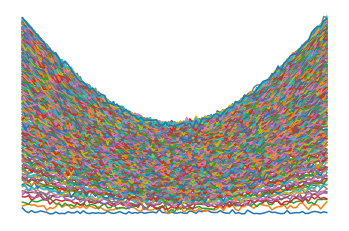

In [275]:
x = np.loadtxt('channeldata.csv',delimiter=',')
plt.plot(x)
plt.axis('off')
ny,nx = x.shape
xx = np.linspace(0,401,nx)
yy = np.linspace(0,101,ny)
x.shape

(-4.95, 103.95, -0.008486070243443293, 0.17820747511230917)

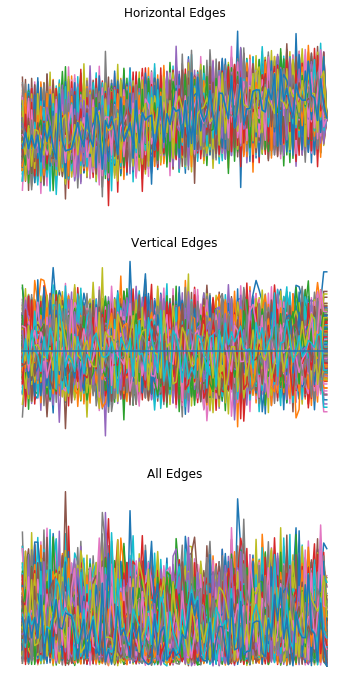

In [276]:
#This should hopefully detect the vertical and horizontal edges or a combination of both.
x1 = pd.read_csv('channeldata.csv')
x = x1.copy()
Dx= [[1,0],[-1,0]]
Dy= [[1,-1], [0,0]]

Gx = sim.convolve(x,Dx)
Gy = sim.convolve(x,Dy)
GG_totaledge = np.sqrt(Gx**2 + Gy**2)

plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.plot(Gx)
plt.title('Horizontal Edges')
plt.axis('off')

# The vertical edges
plt.subplot(3,1,2)
plt.plot(Gy)
plt.title('Vertical Edges')
plt.axis('off')



# All edges that were detected
plt.subplot(3,1,3)
plt.plot(GG_totaledge)
plt.title('All Edges')
plt.axis('off')

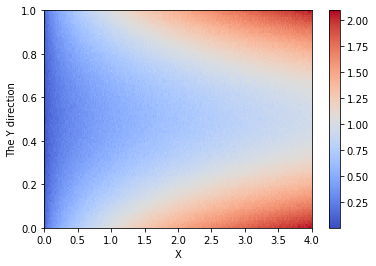

In [345]:
# (C) The Gradient of the file.
x = np.loadtxt('channeldata.csv',delimiter=',')
ny,nx = x.shape
xx = np.linspace(0,4,nx)
yy = np.linspace(0,1,ny)
plt.pcolormesh(xx,yy,x,cmap='coolwarm')# I think this is how it's meant to look
plt.xlabel('X')
plt.ylabel('The Y direction')
plt.colorbar()
#plt.axis('off')

In [394]:
xn = np.linspace(0,4,nx)
yn = np.linspace(0,1,ny)



In [395]:
#x derivatives
xd = xn[1]-xn[0]
dCdx = np.zeros(x.shape)

#First point
dCdx[:,0]= (-3*x[:,0] +4*x[:,1]- x[:,2])/(2*xd)
#Last point
dCdx[:,-1]= (3*x[:,-1] -4*x[:,-2] + x[:,-3])/(2*xd)

#All other columns
dCdx[:,1:-1]=(x[:,2:]-x[:,:-2])/(2*xd)

In [396]:
#Y Derivatives 
yd = yn[1] - yn[0]
dCdy = np.zeros(x.shape)

#The first point
dCdy[0,:] = (-3*x[0,:] +4*x[1,:]- x[2,:])/(2*yd)
#The last point
dCdy[-1,:]= (3*x[-1,:]-4*x[-2,:] + x[-3,:])/(2*yd)
#All other vectorized points
dCdy[1:-1,:] = (x[2:,:] -x[:-2,:])/(2*yd)

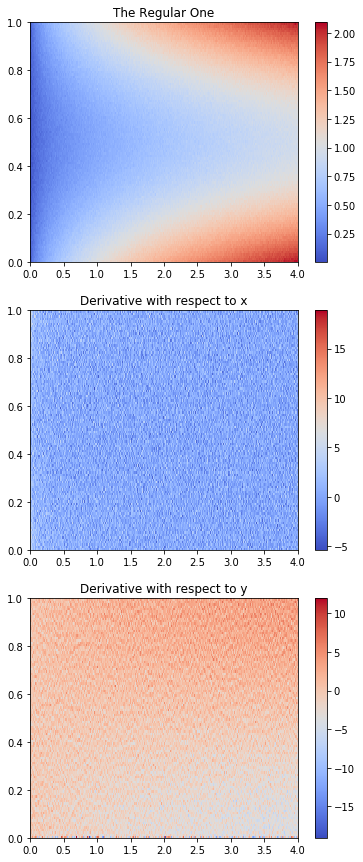

In [397]:
k = 1
x_n, y_n = np.meshgrid(xn,yn)
#X&Y are done
xd = xn[1]-xn[0]
dx = k*dCdx
dy = k*dCdy
#The plots

plt.figure(figsize=(6,15))
plt.subplot(311)
plt.pcolormesh(xx,yy,x,cmap='coolwarm')
plt.title('The Regular One')
plt.colorbar()


plt.subplot(312)
plt.pcolormesh(xx,yy,dx,cmap='coolwarm')
plt.title('Derivative with respect to x')
plt.colorbar()

plt.subplot(313)
plt.pcolormesh(xx,yy,dy,cmap='coolwarm')
plt.title('Derivative with respect to y')
plt.colorbar()

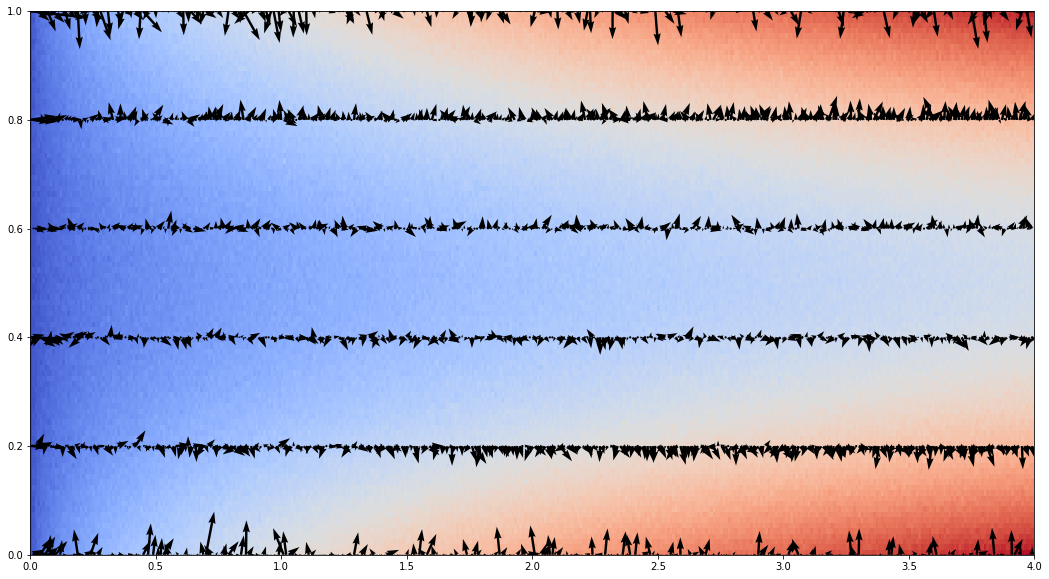

In [398]:
#The vectorized derivatives
#I'm using x_n & y_n
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap='coolwarm')
plt.quiver(x_n[::20],y_n[::20],dx[::20],dy[::20])

#THIS Is the vector form.

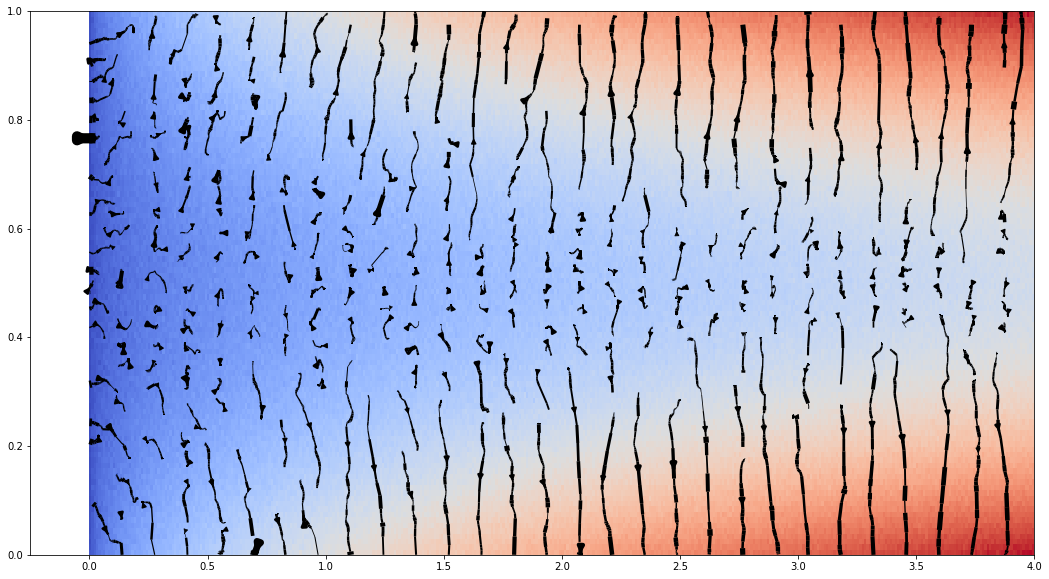

In [399]:
#dding a streamplot to see how this goes
#Uncomment the bottom and run it.
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap ='coolwarm')
plt.streamplot(x_n,y_n,dx,dy,linewidth=1*sqrxy,color='k')
plt.show()


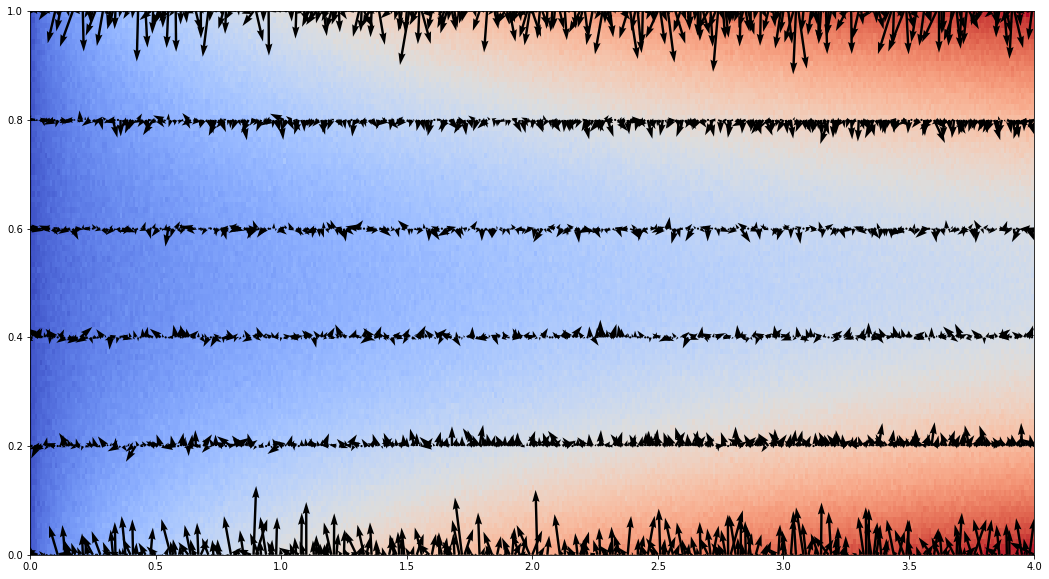

In [400]:
# My attempt at (D)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap='coolwarm')
plt.quiver(x_n[::20],y_n[::20],dx[::20]*(-0.1)+((4*y_n[::20])*(1-y_n[::20])*(0.01)),dy[::20]*(-0.1))
#THIS Is the vector form.

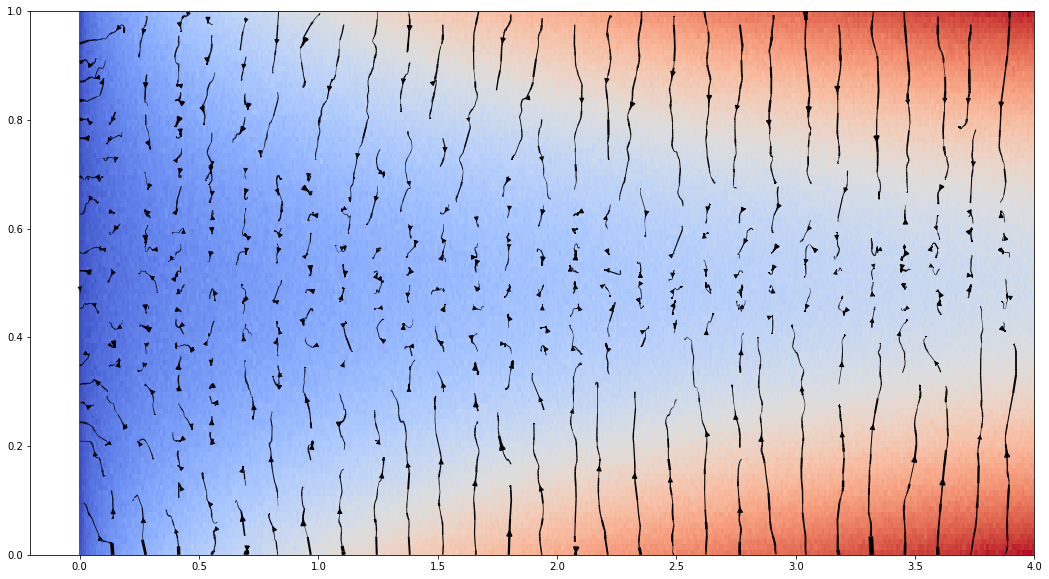

In [401]:
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap ='coolwarm')
plt.streamplot(x_n,y_n,dx*(-0.1)+((4*y_n)*(1-y_n)*(0.01)),dy*(-0.1),linewidth=0.5*sqrxy,color='k')
plt.show()


In [338]:
# My attempt at (E)
#It's below. In all honesty, I don't think this is right.

(101, 401)


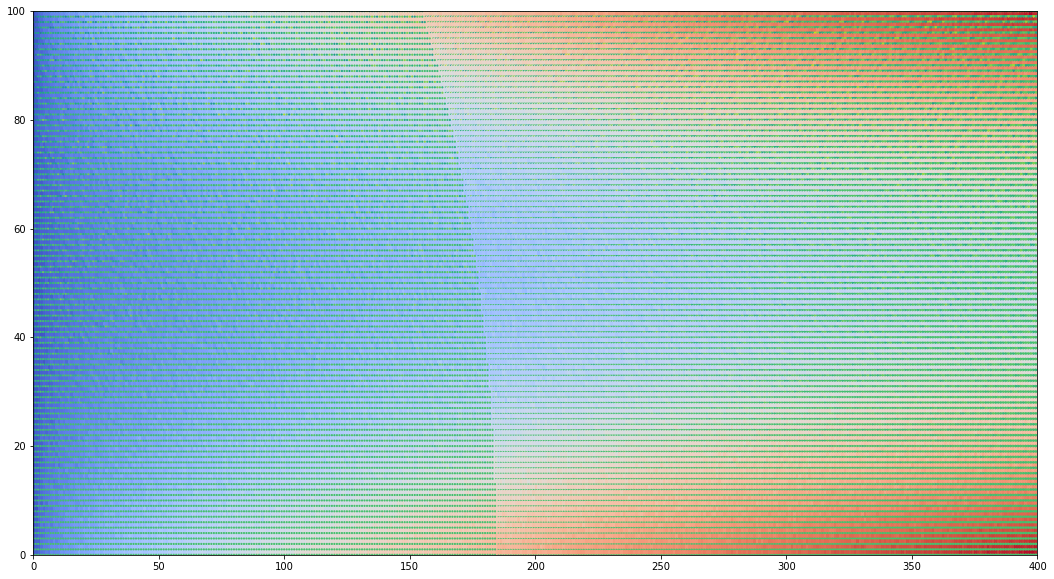

In [412]:
rang = np.arange(0.5,4.0,0.1)
qx = ((dx*(-0.1)+((4*y_n)*(1-y_n)*(0.01)))*(y_n))/100
#dy.shape
plt.figure(figsize=(18,10))
plt.pcolormesh(xx*100,yy*100,x*100,cmap='coolwarm')
plt.quiver(x_n[::],y_n[::],qx[::],color='g')
#This doesn't look right. I'll see if they're any other ways to solve it